In [7]:
import pandas as pd
from glob import glob
import os
import numpy as np

from datetime import date

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-notebook')
plt.style.use('fivethirtyeight')

today=date.today().strftime("%Y%m%d")

from sqlalchemy import create_engine
user = 'airflow'
password = 'airflow'
db_host = 'mariadb'
db_name = 'elekin'

engine = create_engine('mariadb+pymysql://{}:{}@{}/{}'.format(user, password, db_host, db_name))
conn = engine.connect()

feature = 'radius'
extra = ''
table_name = f'{feature}{extra}_20220918'

In [8]:
table_name

'radius_20220918'

In [9]:
dataset=pd.read_sql(table_name ,engine,)
#dataset.set_index('subject_id')

In [10]:
dataset.shape

(4096, 53)

In [12]:
dataset.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
C01_1,0.0,139.620900,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,...,997.487787,979.175270,1034.235620,1066.965460,999.014689,942.927995,1036.912911,1151.298834,982.072539,483.010809
C01_2,0.0,177.638597,0.390007,98.670267,1.486433,65.696246,1.468200,53.061058,2.555435,38.790364,...,1301.393575,1251.307658,1302.797461,1369.075476,1301.355801,1204.302986,1303.042299,1478.651430,1298.856321,648.930921
C02_1,0.0,165.129208,75.105002,60.954687,79.922491,1.267699,59.984786,32.058377,28.960504,40.842755,...,1251.325544,1299.867162,1275.004203,1178.671308,1123.337857,1200.059497,1332.742629,1307.722632,981.532320,452.813459
C02_2,0.0,173.566930,12.538338,98.870983,6.796911,54.299251,28.669934,67.275333,19.184871,21.175951,...,1308.708234,1245.064585,1272.218708,1352.816851,1310.048849,1198.136660,1270.206040,1460.402804,1314.015097,665.423711
C03_1,0.0,166.031850,8.080932,90.450864,7.924876,63.235794,10.693387,45.703312,9.096422,38.049525,...,1265.530901,1232.906024,1290.244810,1333.366723,1249.784696,1162.647445,1257.594681,1396.228549,1198.613947,591.203831
C03_2,0.0,180.350795,41.227959,86.294948,48.882486,45.543480,48.885964,24.135413,44.591785,12.601539,...,1435.333959,1387.195868,1337.925979,1418.185750,1455.628004,1327.821580,1317.869310,1541.123079,1480.204101,780.894319
C04_1,0.0,161.024240,40.055824,75.249197,46.311036,37.062750,44.633324,13.999659,39.214888,1.339935,...,1355.576308,1319.926409,1270.756772,1335.490526,1369.654979,1248.364098,1220.997383,1409.210681,1350.339113,712.034554
C04_2,0.0,110.060886,99.070962,40.930922,12.894843,44.460876,36.488347,14.936605,16.905209,25.193691,...,1308.364114,1251.367879,1301.153301,1299.393561,1235.297551,1339.618249,1264.488789,1219.616455,1462.614559,975.511712
C05_1,0.0,148.977538,57.607539,53.952940,59.470150,8.508913,46.695043,16.436422,28.165859,27.300014,...,1328.191856,1343.716973,1266.540213,1270.298403,1341.828611,1256.201658,1166.263115,1331.825197,1346.307820,738.125077
C05_2,0.0,160.749182,55.434133,63.421269,61.959434,22.294375,46.006378,13.434043,40.761709,18.767840,...,1330.045029,1335.666019,1264.957878,1299.224024,1377.221649,1284.263776,1216.744958,1408.162385,1409.244675,765.893860


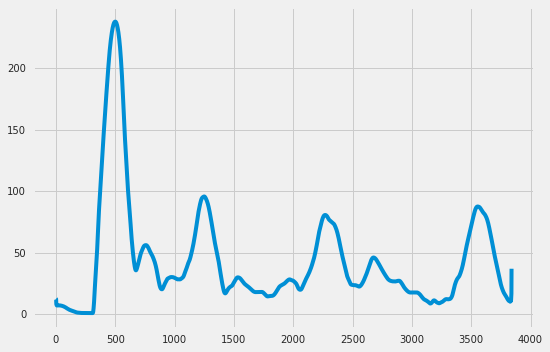

In [252]:
_=dataset['T018'].plot(legend=False)

In [240]:
from functools import reduce
def make_sliding(df, N, s=1):
    """
    Each variable is represented for each column of the dataframe df
    :param df: contains multivariate timeseries dataframe represented by each column
    :param N: Window size. Since it is a classification problem it won't contain the label.
    :param s: Sliding step
    :return: Each column containg obtained window per value
    """
    dfs = [df.shift(-i).dropna().applymap(lambda x: [x]) for i in range(0, N, s)]
    return reduce(lambda x, y: x.add(y), dfs).dropna()

In [241]:
N = 50
s = 1
df1 = make_sliding(dataset, N, s)

In [242]:
df1.head()

,C01_1,C01_2,C02_1,C02_2,C03_1,C03_2,C04_1,C04_2,C05_1,C05_2,...,T018,T021,T023_1,T023_2,T025,T026,T027,T028_1,T028_2,T029
0,"[164.01840939939922, 164.47944728476202, 165.4...","[48.71416661515635, 48.190951208955944, 48.080...","[138.32268026799287, 138.28650711963323, 138.9...","[85.31785522421124, 84.56089000408925, 84.5672...","[177.17691570490518, 177.3222630811321, 178.01...","[29.85803238508873, 29.55979765885882, 29.5100...","[12.10822334033897, 12.09798416244011, 7.35937...","[60.65475981591342, 60.38311429583804, 60.8188...","[20.957101819853357, 20.935830257994635, 19.40...","[37.31203542607221, 37.87037664297082, 38.4458...",...,"[12.280356844530019, 12.19284043944539, 8.3992...","[213.8577422532035, 214.96318892807315, 216.26...","[278.43500628239104, 223.94097191012872, 164.7...","[710.7848467826159, 680.8834594127784, 654.796...","[300.26887273243665, 209.57650192571973, 122.0...","[430.5893409544495, 405.14783665345567, 387.04...","[135.37900518716458, 134.774533337854, 134.693...","[1457.9348920103398, 1456.3885721826869, 1457....","[326.24005608041625, 304.3143012059733, 283.13...","[428.2344303471574, 416.3363481112726, 407.306..."
1,"[164.47944728476202, 165.45101919385576, 165.9...","[48.190951208955944, 48.08093971574275, 47.553...","[138.28650711963323, 138.96160028716287, 139.3...","[84.56089000408925, 84.56724048240908, 83.9004...","[177.3222630811321, 178.01020541871145, 178.14...","[29.55979765885882, 29.510062936217125, 29.683...","[12.09798416244011, 7.359372849447061, 7.06820...","[60.38311429583804, 60.818899270123325, 61.257...","[20.935830257994635, 19.403039710262526, 19.30...","[37.87037664297082, 38.445851316481324, 39.349...",...,"[12.19284043944539, 8.399251429818083, 7.91849...","[214.96318892807315, 216.2664089045045, 217.56...","[223.94097191012872, 164.79459814031503, 103.4...","[680.8834594127784, 654.7965735888544, 627.193...","[209.57650192571973, 122.07196422151337, 120.2...","[405.14783665345567, 387.0401722847518, 364.84...","[134.774533337854, 134.693565568839, 134.59435...","[1456.3885721826869, 1457.2832242795785, 1463....","[304.3143012059733, 283.1372780915996, 259.438...","[416.3363481112726, 407.30658046070124, 407.07..."
2,"[165.45101919385576, 165.96909518225894, 166.7...","[48.08093971574275, 47.55370222100973, 47.5698...","[138.96160028716287, 139.34033024908405, 139.6...","[84.56724048240908, 83.90043406062641, 83.7421...","[178.01020541871145, 178.14637664009928, 178.6...","[29.510062936217125, 29.683633800724728, 30.11...","[7.359372849447061, 7.068205160931092, 5.63582...","[60.818899270123325, 61.257592845573214, 61.42...","[19.403039710262526, 19.302994619747107, 19.22...","[38.445851316481324, 39.34914105284907, 40.277...",...,"[8.399251429818083, 7.918494700089146, 7.69928...","[216.2664089045045, 217.5699569853709, 218.809...","[164.79459814031503, 103.45949494913773, 88.16...","[654.7965735888544, 627.1939923032696, 595.603...","[122.07196422151337, 120.27865985158104, 120.8...","[387.0401722847518, 364.8449592473668, 334.461...","[134.693565568839, 134.59435761790894, 134.120...","[1457.2832242795785, 1463.62906611785, 1470.48...","[283.1372780915996, 259.43891679025876, 230.74...","[407.30658046070124, 407.0700057705329, 407.13..."
3,"[165.96909518225894, 166.7387521741033, 167.22...","[47.55370222100973, 47.56985020966479, 47.0343...","[139.34033024908405, 139.6305212675466, 139.98...","[83.90043406062641, 83.74215609978904, 83.0123...","[178.14637664009928, 178.62520750818246, 178.7...","[29.683633800724728, 30.112051556395077, 30.41...","[7.068205160931092, 5.635824364386289, 5.06737...","[61.257592845573214, 61.42846116341728, 61.396...","[19.302994619747107, 19.226926250624587, 19.11...","[39.34914105284907, 40.277931205530244, 41.227...",...,"[7.918494700089146, 7.699286245028005, 7.14714...","[217.5699569853709, 218.8092515265673, 219.954...","[103.45949494913773, 88.16212454478152, 69.208...","[627.1939923032696, 595.6038451910288, 560.120...","[120

In [243]:
df2 = df1.reset_index().melt(id_vars=['index']).set_index('variable')
df2

,index,value
variable,,
C01_1,0,"[164.01840939939922, 164.47944728476202, 165.4..."
C01_1,1,"[164.47944728476202, 165.45101919385576, 165.9..."
C01_1,2,"[165.45101919385576, 165.96909518225894, 166.7..."
C01_1,3,"[165.96909518225894, 166.7387521741033, 167.22..."
C01_1,4,"[166.7387521741033, 167.22261000012648, 167.90..."
...,...,...
T029,3787,"[392.656504557592, 394.9164937213145, 397.1198..."
T029,3788,"[394.9164937213145, 397.119819307003, 399.3805..."
T029,3789,"[397.119819307003, 399.380526526823, 401.56957..."


In [244]:
df3 = df2.apply(lambda x: x.value, axis=1, result_type='expand')
df3

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
variable,,,,,,,,,,,,,,,,,,,,,
C01_1,164.018409,164.479447,165.451019,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,...,177.850493,177.844350,177.812880,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882
C01_1,164.479447,165.451019,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,169.981554,...,177.844350,177.812880,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195
C01_1,165.451019,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,169.981554,170.458249,...,177.812880,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195,177.030057
C01_1,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,169.981554,170.458249,170.923699,...,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195,177.030057,176.912680
C01_1,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,169.981554,170.458249,170.923699,171.335481,...,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195,177.030057,176.912680,176.763820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T029,392.656505,394.916494,397.119819,399.380527,401.569574,403.792695,405.976519,408.115721,410.268789,412.311633,...,448.752963,449.049005,449.219841,449.572517,449.650227,449.949175,450.011655,450.130587,450.298667,450.095919
T029,394.916494,397.119819,399.380527,401.569574,403.792695,405.976519,408.115721,410.268789,412.311633,414.379269,...,449.049005,449.219841,449.572517,449.650227,449.949175,450.011655,450.130587,450.298667,450.095919,450.515417
T029,397.119819,399.380527,401.569574,403.792695,405.976519,408.115721,410.268789,412.311633,414.379269,416.325529,...,449.219841,449.572517,449.650227,449.949175,450.011655,450.130587,450.298667,450.095919,450.515417,449.900118


<AxesSubplot:>

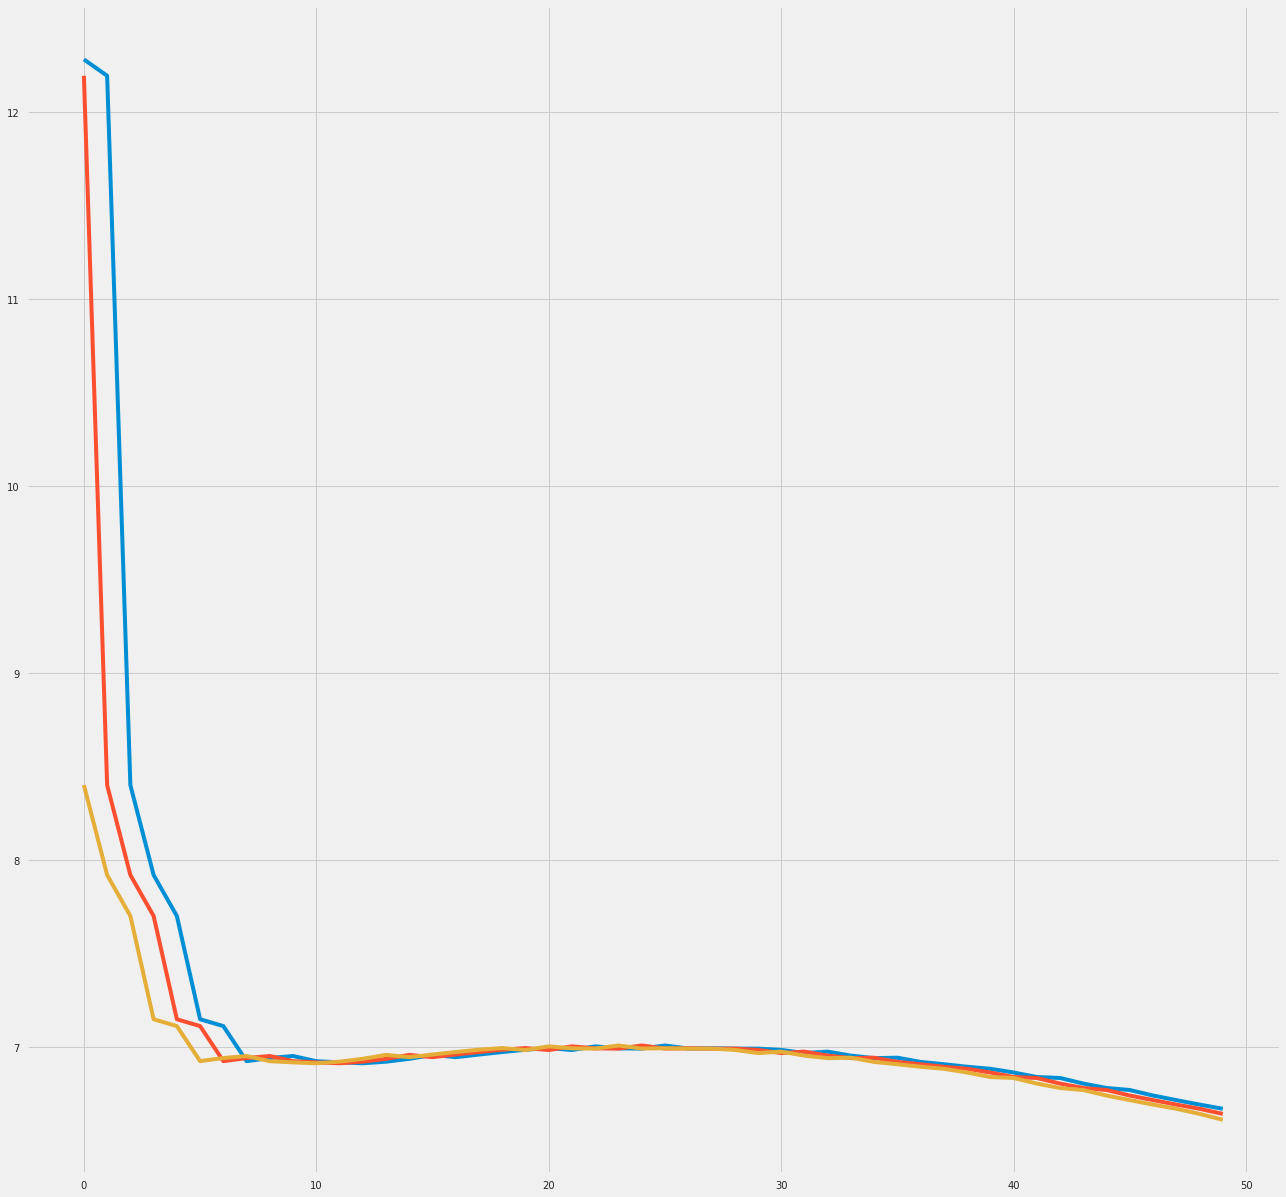

In [253]:
df3.loc['T018'][:3].T.plot(legend=False, figsize=[20,20])

In [13]:
windows_db=pd.read_sql('radius_windowing__1_20220918' ,engine,)

In [3]:
windows_db

,subject_id,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,C01_1,164.018409,164.479447,165.451019,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,...,177.850493,177.844350,177.812880,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882
1,C01_1,164.479447,165.451019,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,...,177.844350,177.812880,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195
2,C01_1,165.451019,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,169.981554,...,177.812880,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195,177.030057
3,C01_1,165.969095,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,169.981554,170.458249,...,177.791946,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195,177.030057,176.912680
4,C01_1,166.738752,167.222610,167.903181,168.409312,168.984214,169.434122,169.981554,170.458249,170.923699,...,177.753444,177.674964,177.576530,177.492433,177.407362,177.287882,177.152195,177.030057,176.912680,176.763820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200971,T029,392.656505,394.916494,397.119819,399.380527,401.569574,403.792695,405.976519,408.115721,410.268789,...,448.752963,449.049005,449.219841,449.572517,449.650227,449.949175,450.011655,450.130587,450.298667,450.095919
200972,T029,394.916494,397.119819,399.380527,401.569574,403.792695,405.976519,408.115721,410.268789,412.311633,...,449.049005,449.219841,449.572517,449.650227,449.949175,450.011655,450.130587,450.298667,450.095919,450.515417
200973,T029,397.119819,399.380527,401.569574,403.792695,405.976519,408.115721,410.268789,412.311633,414.379269,...,449.219841,449.572517,449.650227,449.949175,450.011655,450.130587,450.298667,450.095919,450.515417,449.900118
200974,T029,399.380527,401.569574,403.792695,405.976519,408.115721,410.268789,412.311633,414.379269,416.325529,...,449.572517,449.650227,449.949175,450.011655,450.130587,450.298667,450.095919,450.515417,449.900118,450.790703


In [247]:
windows_db=windows_db.set_index('subject_id')

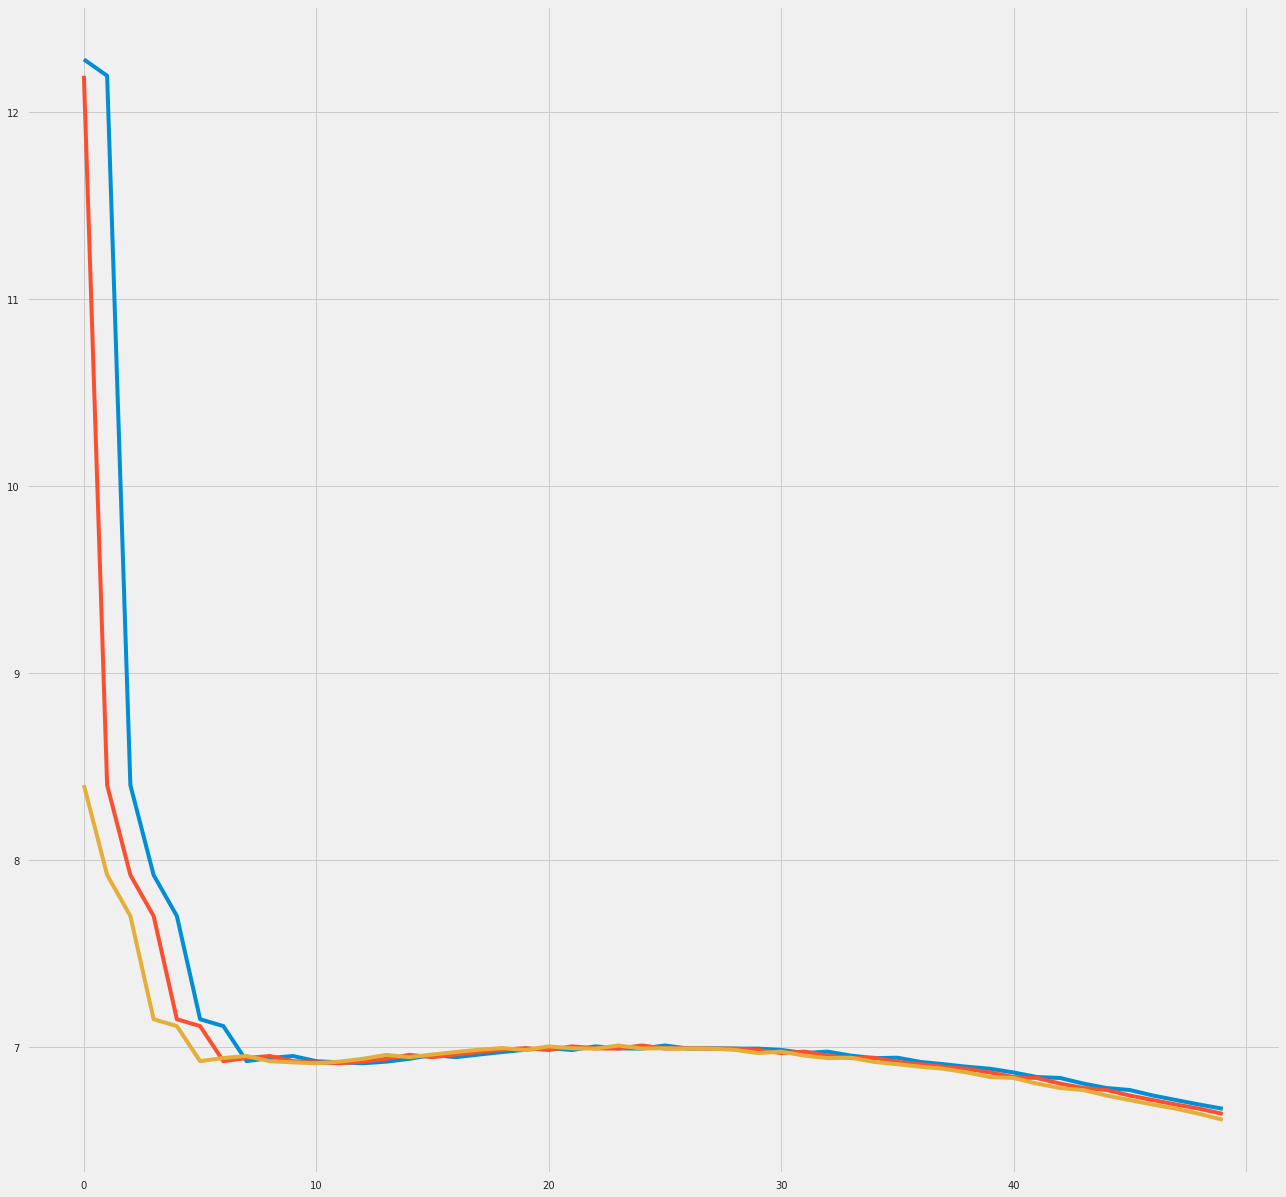

In [254]:
_=windows_db.loc['T018'][:3].T.plot(legend=False, figsize=[20,20])

In [258]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

labels = pd.read_sql("labels_20220918" ,engine, index_col='subject_id')
labels

,temblor
subject_id,
C01_1,no
C01_2,no
C02_1,no
C02_2,no
C03_1,no
C03_2,no
C04_1,no
C04_2,no
C05_1,no
